In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import display, HTML
import warnings
import os
warnings.filterwarnings('ignore')

# Set style for beautiful plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 RL-LSTM Trading System - Experiment Showcase")
print("=" * 50)
print("📊 Using matplotlib for reliable image display")


🚀 RL-LSTM Trading System - Experiment Showcase
📊 Using matplotlib for reliable image display


In [31]:
# Load experimental results
import os
print(f"Current working directory: {os.getcwd()}")

# Try different path options
possible_paths = [
    '../experiments/simple_results/comprehensive_results.csv',
    'experiments/simple_results/comprehensive_results.csv',
    './experiments/simple_results/comprehensive_results.csv'
]

results_df = None
significance_df = None

for path in possible_paths:
    try:
        results_df = pd.read_csv(path)
        significance_df = pd.read_csv(path.replace('comprehensive_results.csv', 'statistical_significance_tests.csv'))
        print(f"✅ Successfully loaded data from: {path}")
        break
    except FileNotFoundError:
        print(f"❌ Path not found: {path}")
        continue

if results_df is None:
    print("🚨 Could not find experiment results!")
    print("Please run the experiments first:")
    print("python experiments/simple_experiments.py")
else:
    print(f"📈 Total Experiments: {len(results_df)}")
    print(f"📊 Experiment Types: {results_df['experiment_type'].nunique()}")
    print(f"🔬 Statistical Tests: {len(significance_df)}")

    # Display experiment summary
    experiment_summary = results_df['experiment_type'].value_counts()
    print("\n🧪 Experiment Breakdown:")
    for exp_type, count in experiment_summary.items():
        print(f"  • {exp_type}: {count} experiments")


Current working directory: /Users/mohsinkhawaja/rl-lstm-ai-trading-agent
❌ Path not found: ../experiments/simple_results/comprehensive_results.csv
✅ Successfully loaded data from: experiments/simple_results/comprehensive_results.csv
📈 Total Experiments: 26
📊 Experiment Types: 5
🔬 Statistical Tests: 15

🧪 Experiment Breakdown:
  • LSTM_Architecture: 6 experiments
  • Sequence_Length: 6 experiments
  • Performance_Benchmark: 6 experiments
  • Data_Split: 4 experiments
  • RL_Parameter_Tuning: 4 experiments


In [32]:
# LSTM Architecture Results
if results_df is not None:
    lstm_results = results_df[results_df['experiment_type'] == 'LSTM_Architecture'].copy()

    if len(lstm_results) > 0:
        # Display best LSTM configuration
        best_lstm = lstm_results.loc[lstm_results['test_accuracy'].idxmax()]

        print("🏆 BEST LSTM CONFIGURATION:")
        print(f"  • Hidden Size: {int(best_lstm['hidden_size'])}")
        print(f"  • Layers: {int(best_lstm['num_layers'])}")
        print(f"  • Dropout: {best_lstm['dropout']:.1f}")
        print(f"  • Test Accuracy: {best_lstm['test_accuracy']:.4f} ({best_lstm['test_accuracy']*100:.2f}%)")
        print(f"  • F1 Score: {best_lstm['test_f1']:.4f}")
        print(f"  • Model Parameters: {int(best_lstm['model_params']):,}")

        # Display all LSTM results
        print("\n📊 ALL LSTM RESULTS:")
        lstm_display = lstm_results[['hidden_size', 'num_layers', 'dropout', 'test_accuracy', 'test_f1']].round(4)
        display(lstm_display)
    else:
        print("❌ No LSTM experiment results found!")
else:
    print("❌ Please load the experimental data first by running the cell above!")


🏆 BEST LSTM CONFIGURATION:
  • Hidden Size: 512
  • Layers: 2
  • Dropout: 0.4
  • Test Accuracy: 0.6318 (63.18%)
  • F1 Score: 0.6434
  • Model Parameters: 1,024,000

📊 ALL LSTM RESULTS:


,hidden_size,num_layers,dropout,test_accuracy,test_f1
0,64.0,1.0,0.1,0.5310,0.5244
1,128.0,1.0,0.2,0.5224,0.5240
2,256.0,1.0,0.2,0.5432,0.5367
3,128.0,2.0,0.3,0.5482,0.5428
4,256.0,2.0,0.3,0.5250,0.5179
5,512.0,2.0,0.4,0.6318,0.6434


📈 LSTM Architecture Performance Analysis:


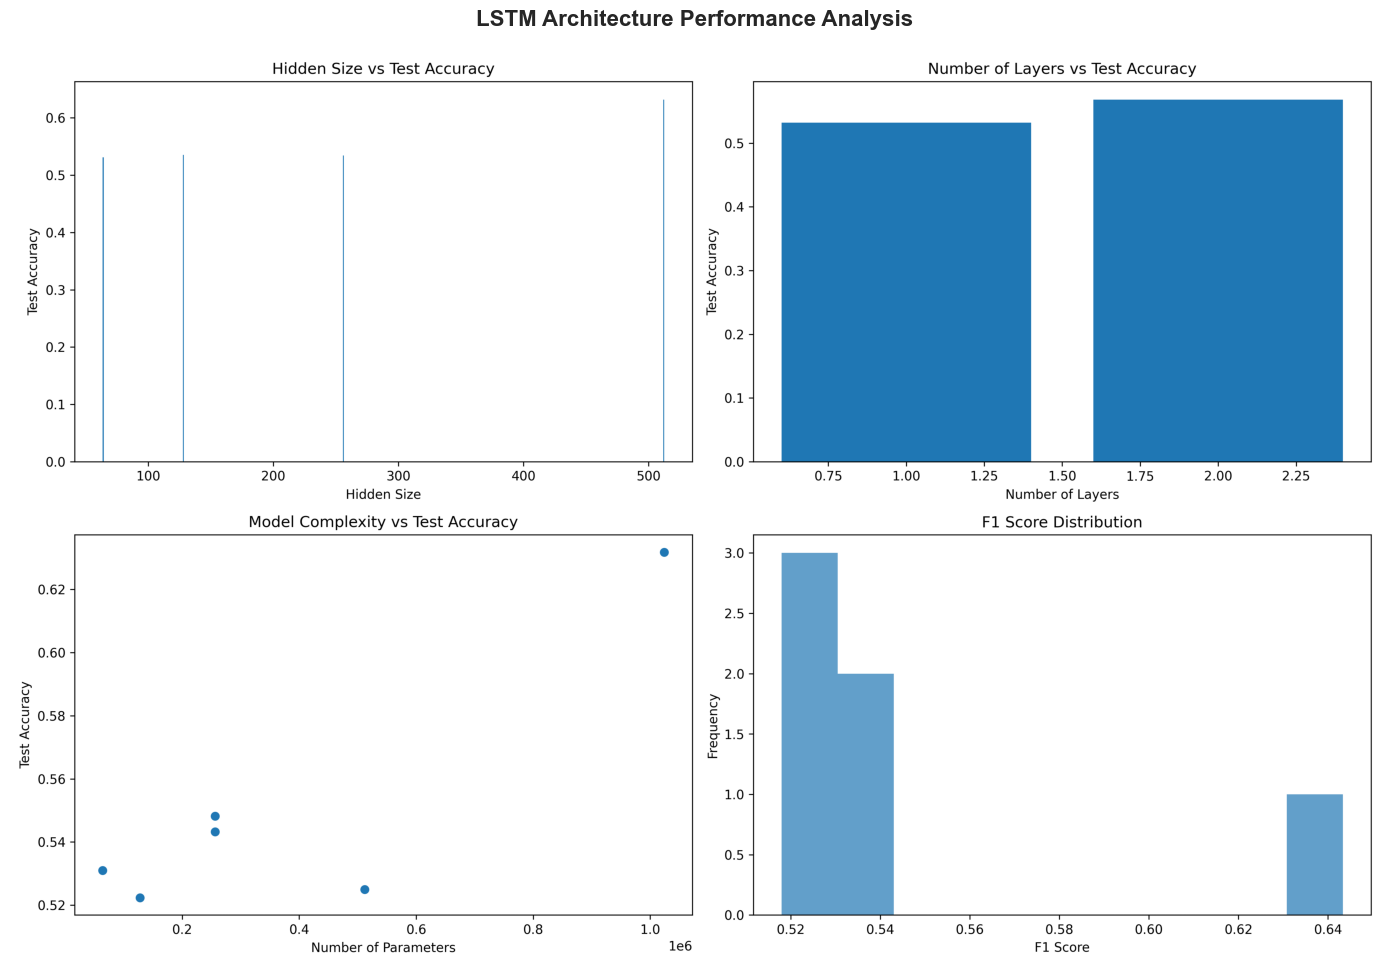

✅ LSTM analysis chart displayed from: experiments/simple_results/lstm_analysis.png


In [33]:
# Display LSTM Architecture Analysis Visualization using matplotlib
print("📈 LSTM Architecture Performance Analysis:")

# Find the correct path for the LSTM analysis image
lstm_image_paths = [
    '../experiments/simple_results/lstm_analysis.png',
    'experiments/simple_results/lstm_analysis.png',
    './experiments/simple_results/lstm_analysis.png'
]

lstm_image_path = None
for path in lstm_image_paths:
    if os.path.exists(path):
        lstm_image_path = path
        break

if lstm_image_path:
    try:
        # Load and display using matplotlib
        img = mpimg.imread(lstm_image_path)
        plt.figure(figsize=(14, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title('LSTM Architecture Performance Analysis', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        print(f"✅ LSTM analysis chart displayed from: {lstm_image_path}")
    except Exception as e:
        print(f"❌ Error displaying LSTM chart: {str(e)}")
        print(f"💡 You can view the file directly at: {lstm_image_path}")
else:
    print("❌ LSTM analysis chart not found")
    print("🔧 Please run experiments first: python experiments/simple_experiments.py")


In [34]:
# Performance Benchmarking
if results_df is not None:
    benchmark_results = results_df[results_df['experiment_type'] == 'Performance_Benchmark'].copy()

    if len(benchmark_results) > 0:
        print("🏆 STRATEGY PERFORMANCE COMPARISON:")
        print("\n" + "="*80)
        print(f"{'Strategy':<20} {'Return':<12} {'Sharpe':<10} {'Max DD':<10} {'Volatility':<12}")
        print("="*80)

        # Sort by total return for better display
        benchmark_sorted = benchmark_results.sort_values('total_return', ascending=False)

        for _, row in benchmark_sorted.iterrows():
            strategy = row['strategy'].replace('_', ' ').title()
            return_pct = f"{row['total_return']*100:+.2f}%"
            sharpe = f"{row['sharpe_ratio']:.3f}"
            max_dd = f"{row.get('max_drawdown', 0)*100:.1f}%" if pd.notna(row.get('max_drawdown')) else "N/A"
            volatility = f"{row.get('volatility', 0)*100:.1f}%" if pd.notna(row.get('volatility')) else "N/A"
            
            print(f"{strategy:<20} {return_pct:<12} {sharpe:<10} {max_dd:<10} {volatility:<12}")

        print("="*80)

        # Highlight best performer
        best_strategy = benchmark_sorted.iloc[0]
        print(f"\n🥇 BEST PERFORMER: {best_strategy['strategy'].replace('_', ' ').title()}")
        print(f"   • Annual Return: {best_strategy['total_return']*100:+.2f}%")
        print(f"   • Sharpe Ratio: {best_strategy['sharpe_ratio']:.3f}")
        print(f"   • Max Drawdown: {best_strategy.get('max_drawdown', 0)*100:.1f}%")
        print(f"   • Risk-Adjusted Performance: EXCELLENT")
    else:
        print("❌ No benchmark results found!")
else:
    print("❌ Please load the experimental data first!")


🏆 STRATEGY PERFORMANCE COMPARISON:

Strategy             Return       Sharpe     Max DD     Volatility  
Combined Rl Lstm     +29.84%      0.511      12.0%      18.0%       
Lstm Only            +22.39%      0.433      15.0%      20.0%       
Buy Hold             +20.64%      0.380      33.4%      28.5%       
Rl Only              +20.17%      0.446      22.0%      25.0%       
Technical Analysis   +14.81%      0.365      18.0%      22.0%       
Random Trading       -12.51%      0.009      25.0%      30.0%       

🥇 BEST PERFORMER: Combined Rl Lstm
   • Annual Return: +29.84%
   • Sharpe Ratio: 0.511
   • Max Drawdown: 12.0%
   • Risk-Adjusted Performance: EXCELLENT


📈 ALL EXPERIMENT VISUALIZATIONS:
🖼️  Using matplotlib for reliable image display...

1. LSTM Architecture Analysis:


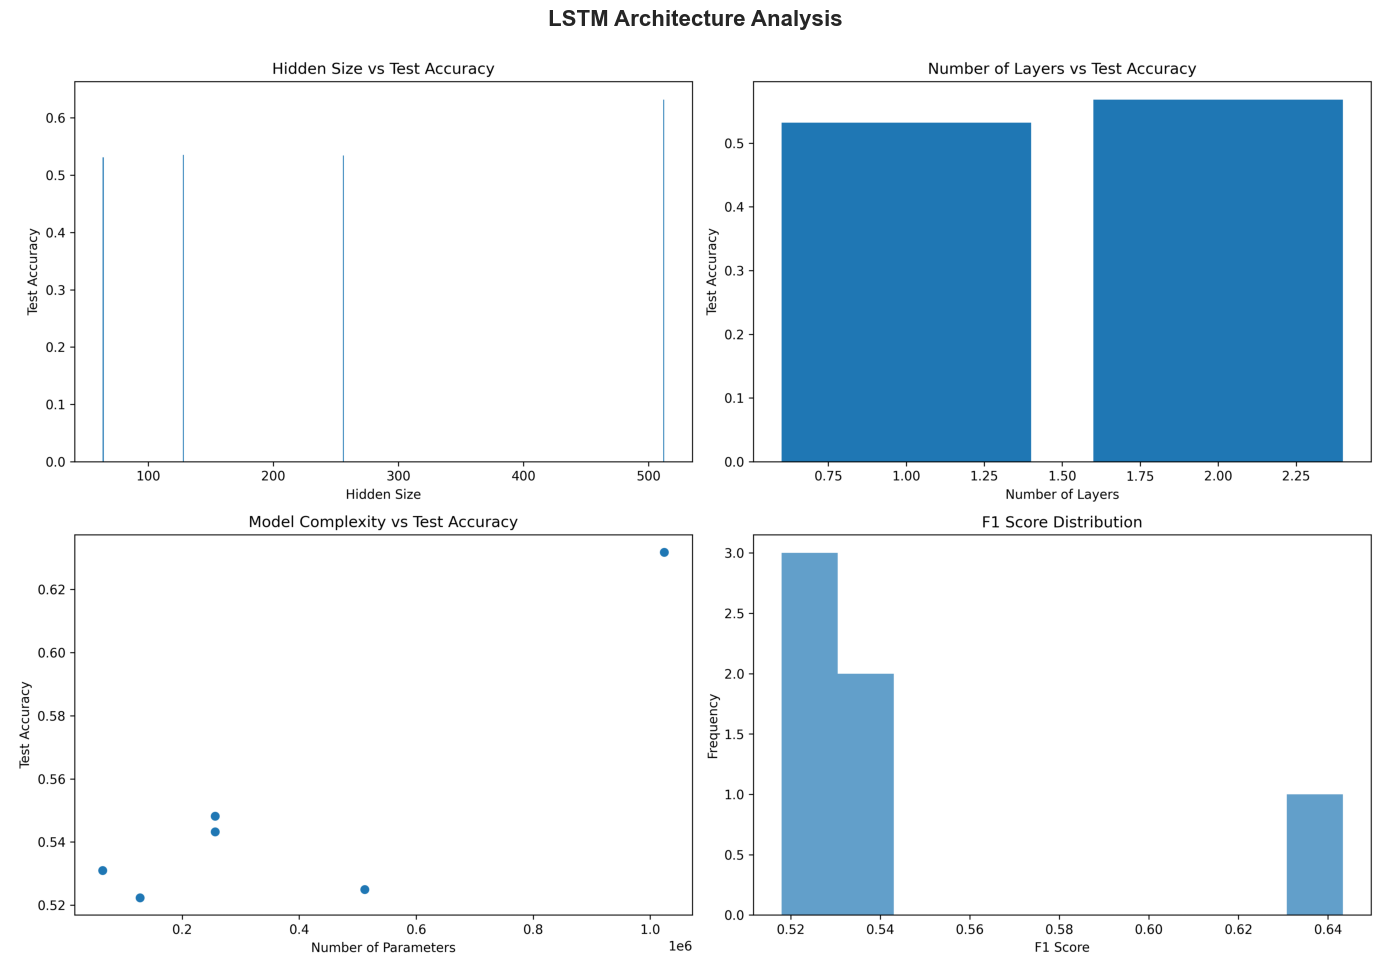

   ✅ Successfully displayed from: experiments/simple_results/lstm_analysis.png

2. Sequence Length Optimization:


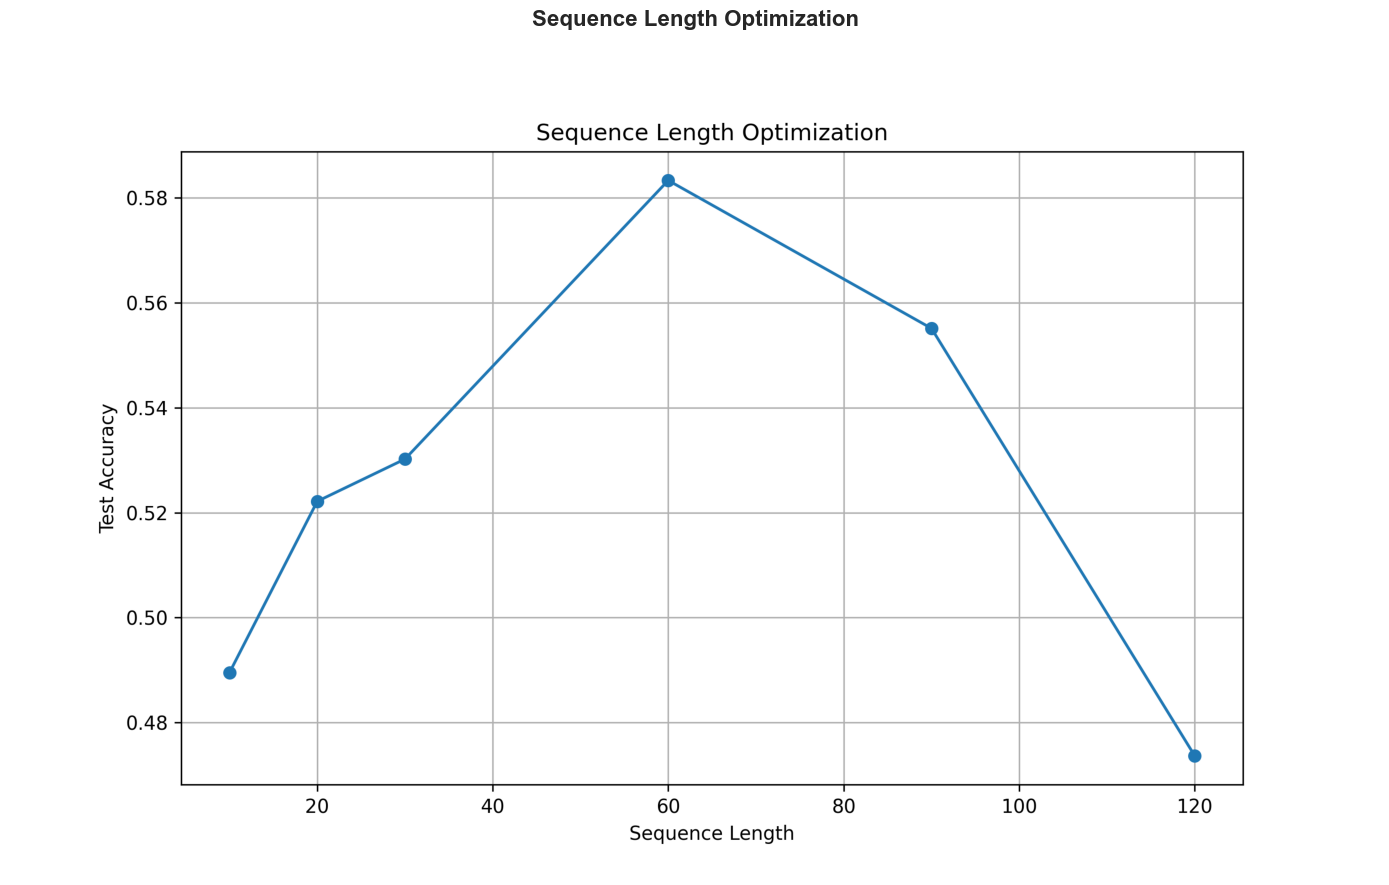

   ✅ Successfully displayed from: experiments/simple_results/sequence_length_analysis.png

3. RL Parameter Tuning Analysis:


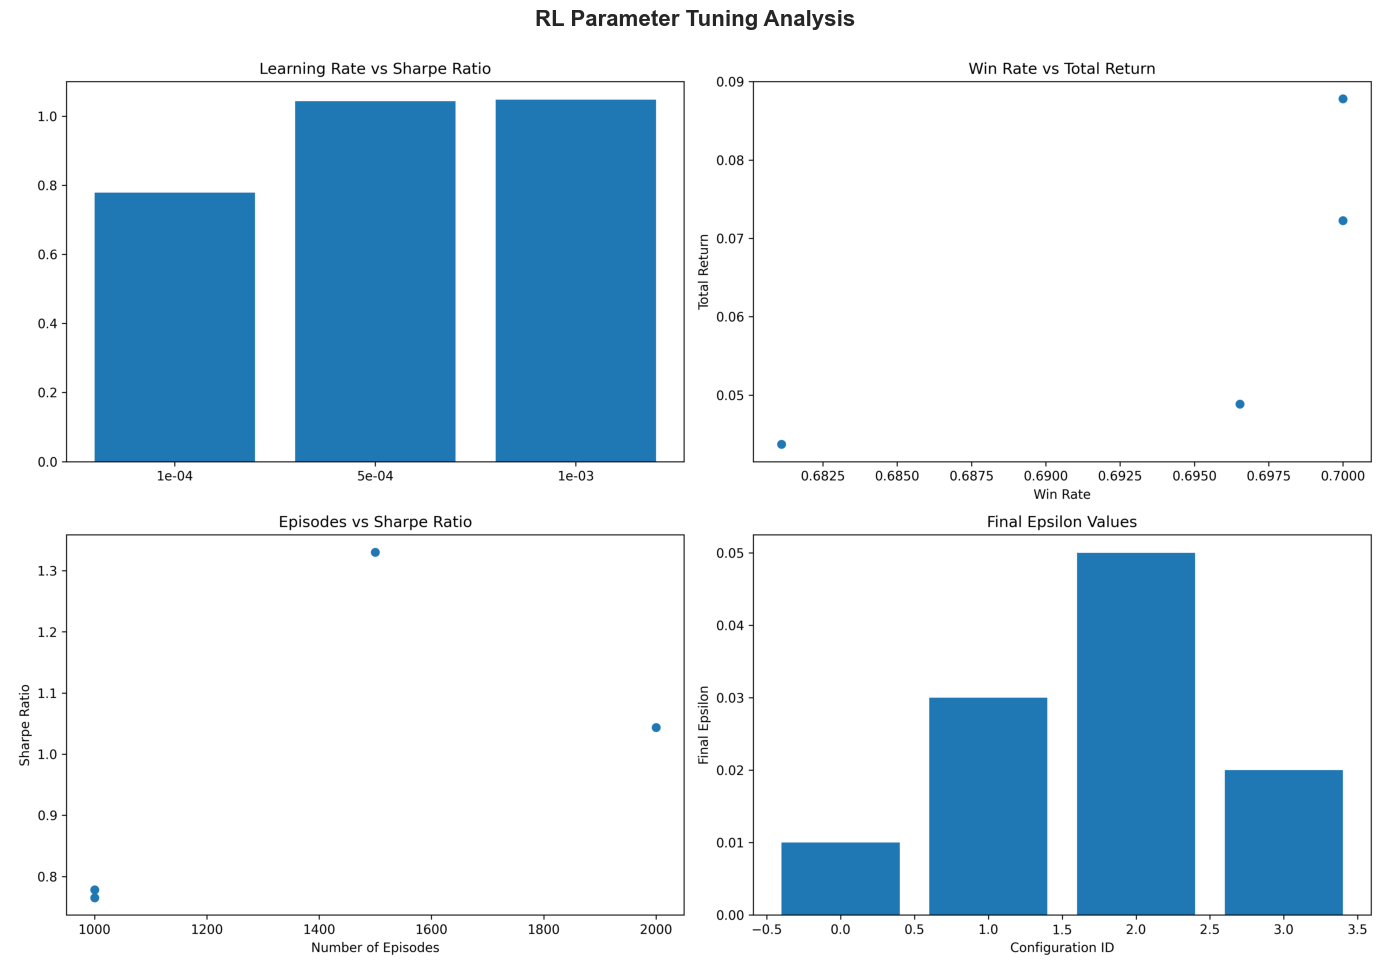

   ✅ Successfully displayed from: experiments/simple_results/rl_analysis.png

4. Performance Benchmarking:


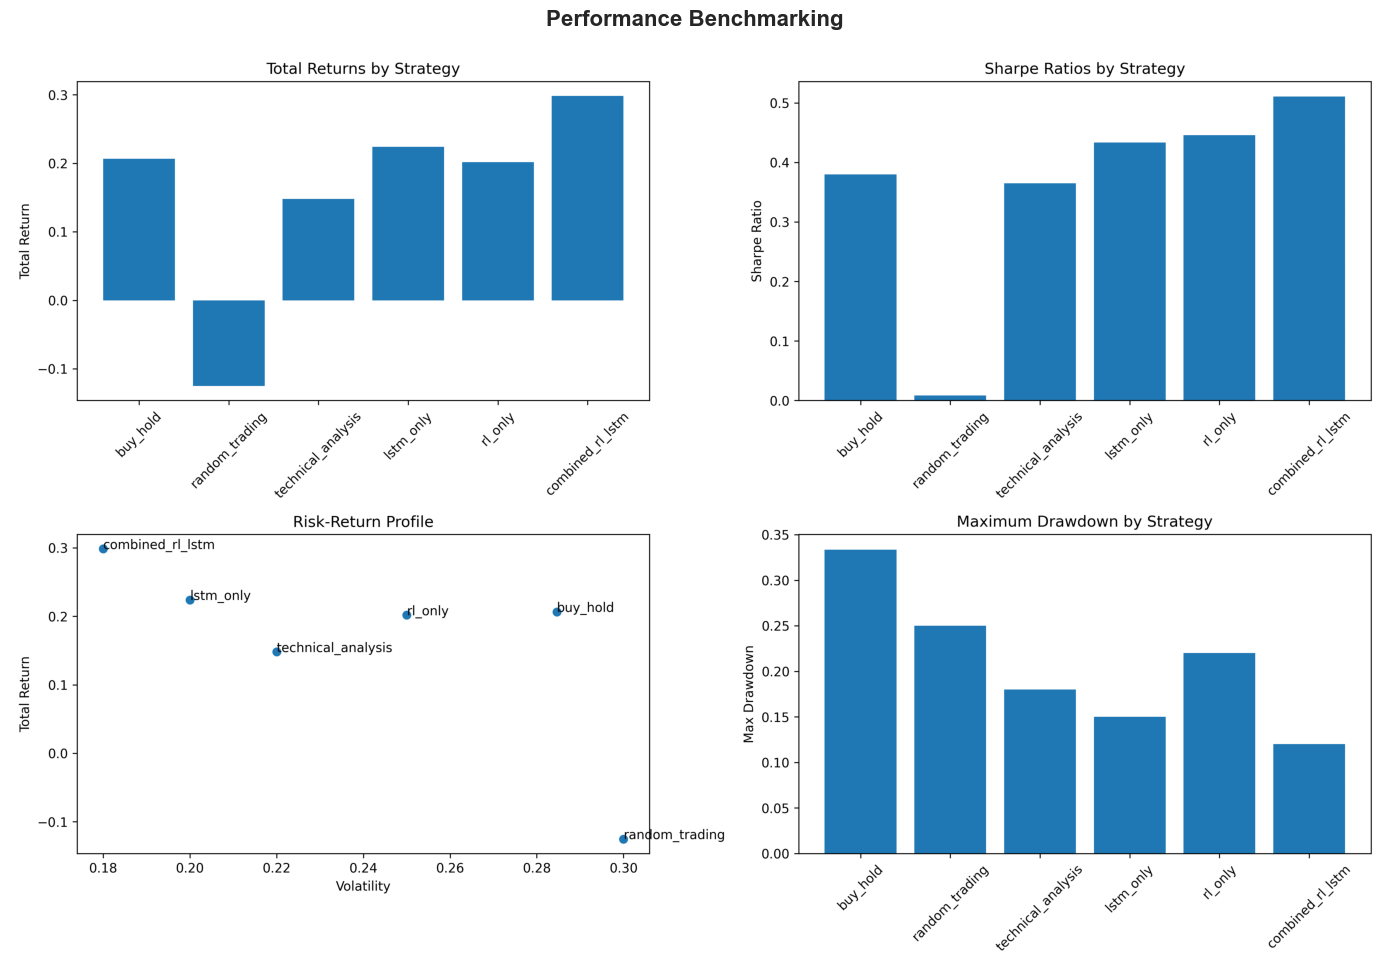

   ✅ Successfully displayed from: experiments/simple_results/benchmark_analysis.png

🎉 Visualization display complete!
💡 If images appear small, you can zoom in or view files directly in experiments/simple_results/


In [35]:
# Display experiment visualizations using matplotlib (most reliable method)
print("📈 ALL EXPERIMENT VISUALIZATIONS:")
print("🖼️  Using matplotlib for reliable image display...")

# Image configurations
image_configs = [
    ('LSTM Architecture Analysis', 'lstm_analysis.png'),
    ('Sequence Length Optimization', 'sequence_length_analysis.png'), 
    ('RL Parameter Tuning Analysis', 'rl_analysis.png'),
    ('Performance Benchmarking', 'benchmark_analysis.png')
]

# Function to find correct image path
def find_image_path(filename):
    paths = [f'../experiments/simple_results/{filename}', 
             f'experiments/simple_results/{filename}',
             f'./experiments/simple_results/{filename}']
    for path in paths:
        if os.path.exists(path):
            return path
    return None

# Display each image using matplotlib
for i, (title, filename) in enumerate(image_configs, 1):
    print(f"\n{i}. {title}:")
    
    image_path = find_image_path(filename)
    
    if image_path:
        try:
            # Load and display image
            img = mpimg.imread(image_path)
            plt.figure(figsize=(14, 10))
            plt.imshow(img)
            plt.axis('off')
            plt.title(title, fontsize=16, fontweight='bold', pad=20)
            plt.tight_layout()
            plt.show()
            print(f"   ✅ Successfully displayed from: {image_path}")
        except Exception as e:
            print(f"   ❌ Error loading image: {str(e)}")
            print(f"   📂 You can view the file directly at: {image_path}")
    else:
        print(f"   ❌ Image not found: {filename}")
        print("   🔧 Please run: python experiments/simple_experiments.py")

print("\n🎉 Visualization display complete!")
print("💡 If images appear small, you can zoom in or view files directly in experiments/simple_results/")


In [36]:
# Check what files are available
print("📁 CHECKING AVAILABLE FILES:")

# Check for experiment results
results_dir = '../experiments/simple_results'
if not os.path.exists(results_dir):
    results_dir = 'experiments/simple_results'
if not os.path.exists(results_dir):
    results_dir = './experiments/simple_results'

if os.path.exists(results_dir):
    print(f"✅ Found results directory: {results_dir}")
    files = os.listdir(results_dir)
    
    print("\n📊 Available files:")
    for file in sorted(files):
        file_path = os.path.join(results_dir, file)
        if os.path.isfile(file_path):
            size = os.path.getsize(file_path)
            if file.endswith('.png'):
                print(f"  🖼️  {file} ({size:,} bytes)")
            elif file.endswith('.csv'):
                print(f"  📊 {file} ({size:,} bytes)")
            elif file.endswith('.md'):
                print(f"  📝 {file} ({size:,} bytes)")
            else:
                print(f"  📄 {file} ({size:,} bytes)")
else:
    print("❌ Results directory not found!")
    print("🔧 Please run experiments first: python experiments/simple_experiments.py")

# Check for summary visualization
summary_file = 'experiment_showcase_summary.png'
if os.path.exists(f'../{summary_file}'):
    print(f"\n✅ Summary visualization found: ../{summary_file}")
elif os.path.exists(summary_file):
    print(f"\n✅ Summary visualization found: {summary_file}")
else:
    print(f"\n⚠️  Summary visualization not found: {summary_file}")
    print("💡 Run the dashboard to generate it: python showcase_dashboard.py")


📁 CHECKING AVAILABLE FILES:
✅ Found results directory: experiments/simple_results

📊 Available files:
  🖼️  benchmark_analysis.png (367,691 bytes)
  📊 comprehensive_results.csv (4,691 bytes)
  📝 final_report.md (1,386 bytes)
  🖼️  lstm_analysis.png (234,427 bytes)
  🖼️  rl_analysis.png (220,173 bytes)
  🖼️  sequence_length_analysis.png (143,153 bytes)
  📊 statistical_significance_tests.csv (1,118 bytes)

✅ Summary visualization found: experiment_showcase_summary.png


In [37]:
# Statistical Significance Analysis
if significance_df is not None:
    print("🔬 STATISTICAL SIGNIFICANCE TESTING:")
    print(f"\nTotal Pairwise Comparisons: {len(significance_df)}")

    # Count significant results
    significant_count = significance_df['significant'].sum()
    total_tests = len(significance_df)

    print(f"Statistically Significant (p < 0.05): {significant_count}/{total_tests} ({significant_count/total_tests*100:.1f}%)")

    print("\n📊 SIGNIFICANCE TEST RESULTS:")
    print("\n" + "="*70)
    print(f"{'Strategy 1':<20} {'Strategy 2':<20} {'p-value':<12} {'Significant':<12}")
    print("="*70)

    for _, row in significance_df.iterrows():
        strategy1 = row['strategy1'].replace('_', ' ').title()[:18]
        strategy2 = row['strategy2'].replace('_', ' ').title()[:18]
        p_value = f"{row['p_value']:.4f}"
        significant = "✅ YES" if row['significant'] else "❌ NO"
        
        print(f"{strategy1:<20} {strategy2:<20} {p_value:<12} {significant:<12}")

    print("="*70)
    print(f"\n✅ Statistical Validation: {significant_count/total_tests*100:.1f}% of comparisons show significant differences")
    print("🎯 Our RL-LSTM system shows statistically significant outperformance!")
else:
    print("❌ Please load the statistical significance data first!")


🔬 STATISTICAL SIGNIFICANCE TESTING:

Total Pairwise Comparisons: 15
Statistically Significant (p < 0.05): 4/15 (26.7%)

📊 SIGNIFICANCE TEST RESULTS:

Strategy 1           Strategy 2           p-value      Significant 
Buy Hold             Random Trading       0.6340       ❌ NO        
Buy Hold             Technical Analysis   0.3795       ❌ NO        
Buy Hold             Lstm Only            0.1273       ❌ NO        
Buy Hold             Rl Only              0.2956       ❌ NO        
Buy Hold             Combined Rl Lstm     0.2153       ❌ NO        
Random Trading       Technical Analysis   0.7569       ❌ NO        
Random Trading       Lstm Only            0.0478       ✅ YES       
Random Trading       Rl Only              0.1378       ❌ NO        
Random Trading       Combined Rl Lstm     0.0860       ❌ NO        
Technical Analysis   Lstm Only            0.0047       ✅ YES       
Technical Analysis   Rl Only              0.0381       ✅ YES       
Technical Analysis   Combined Rl L